# SimEx sumovsl

In [3]:
import pickle
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

Simulator...
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
MAIN modx [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Validator...
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[1, 3.25]]


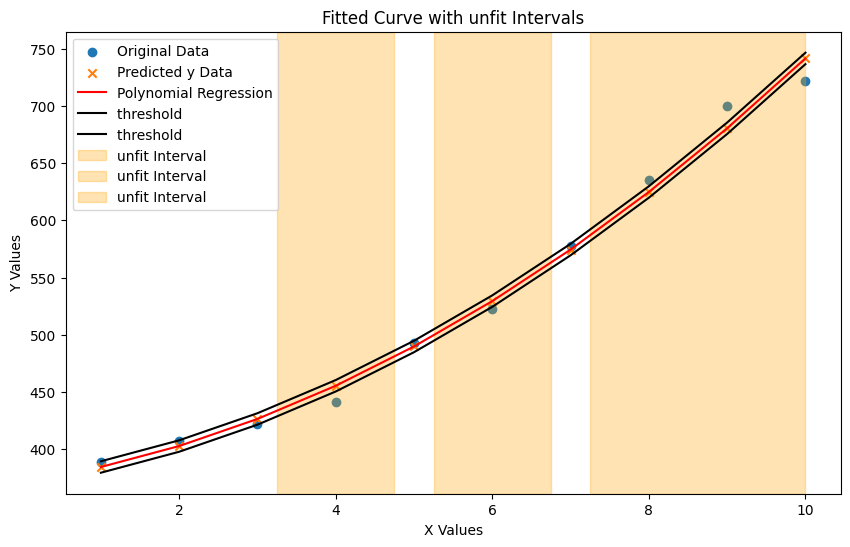

MAIN interval list from VAL: [[3.25, 4.75], [5.25, 6.75], [7.25, 10]]


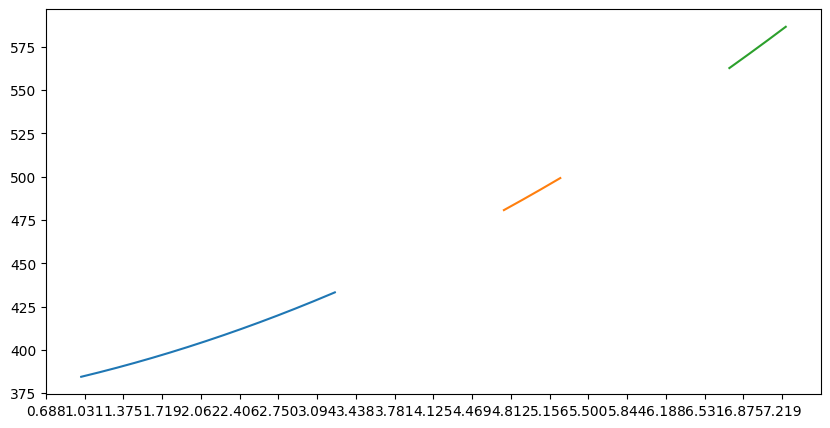

In [4]:
# IMPORT LIBRARIES
import numpy as np

from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
from logger_utils import Logger

validator_controller_vsl = ValidatorController()
logger = Logger()
logger_main_arguments = {}
is_main_func = True

# SUMO vsl
from controller_modifier_scenarios import Controller

# SUMO vsl generate modifiers [[1,[2900,...2900],[2,[3000,...3000]....]
modlist = Controller.get_list_of_modifiers(10)
# print(f"Mod list: {modlist}")
# mod_x_list = modlist

# Calls Simulator
# Input: list of ids and modifiers [[1,[2900,...2900],[2,[3000,...3000]....]
# Output: IDs,SIMULATED(values) [[1,388.88],[2,420.22]]
# USE the sumo_simulator_vsl or sumo_simulator_novsl function such as components['sumo_simulator_novsl']
mod_x,sim_y_list = SimulatorController.simulator(modlist,selected_simulator=components['sumo_simulator_vsl'])
assert len(mod_x) == len(sim_y_list)

print("MAIN modx", mod_x)

# Calls Validator controller
intervals_list_vsl =  validator_controller_vsl.validate(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list), selected_validator=components['validator'],global_interval=[1, 10])
print("MAIN interval list from VAL:", intervals_list_vsl)

save_object(validator_controller_vsl,"vc_vsl.pkl")


# MAIN cycle completed/interrupted -> write OVERALL statistics        
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)

## Run without vsl

Simulator...
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
MAIN modx [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Validator...
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[1, 1.25]]


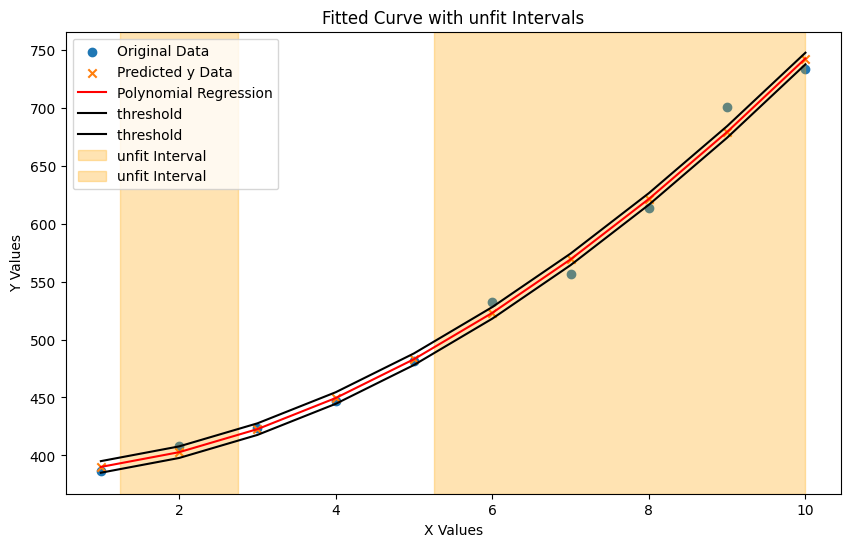

MAIN interval list from VAL: [[1.25, 2.75], [5.25, 10]]


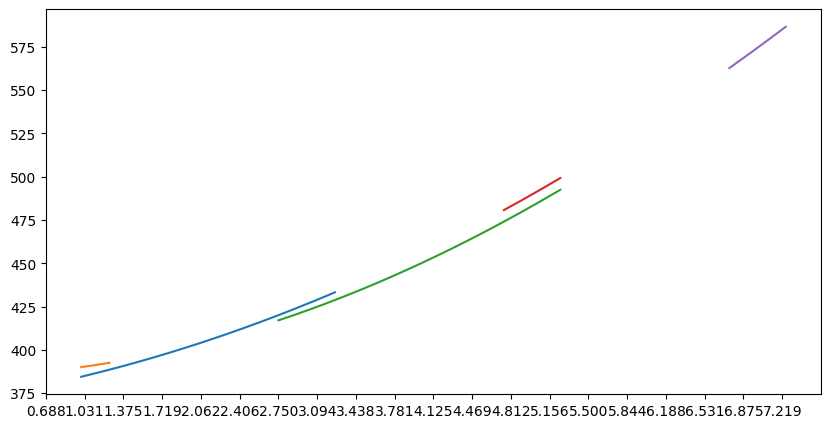

In [5]:
# IMPORT LIBRARIES
import numpy as np

from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
from logger_utils import Logger

validator_controller_novsl = ValidatorController()
logger = Logger()
logger_main_arguments = {}
is_main_func = True

# SUMO vsl
from controller_modifier_scenarios import Controller

# SUMO vsl generate modifiers [[1,[2900,...2900],[2,[3000,...3000]....]
#modlist = Controller.get_list_of_modifiers(10)
# print(f"Mod list: {modlist}")
# mod_x_list = modlist

# Calls Simulator
# Input: list of ids and modifiers [[1,[2900,...2900],[2,[3000,...3000]....]
# Output: IDs,SIMULATED(values) [[1,388.88],[2,420.22]]
mod_xnv,sim_y_listnv = SimulatorController.simulator(modlist,selected_simulator=components['sumo_simulator_novsl'])
assert len(mod_xnv) == len(sim_y_listnv)

print("MAIN modx", mod_x)

# Calls Validator controller
intervals_list_novsl =  validator_controller_novsl.validate(mod_x_list=np.array(mod_xnv),sim_y_list=np.array(sim_y_listnv), selected_validator=components['validator'],global_interval=[1, 10])
print("MAIN interval list from VAL:", intervals_list_novsl)

save_object(validator_controller_novsl,"vc_novsl.pkl")

# MAIN cycle completed/interrupted -> write OVERALL statistics        
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)

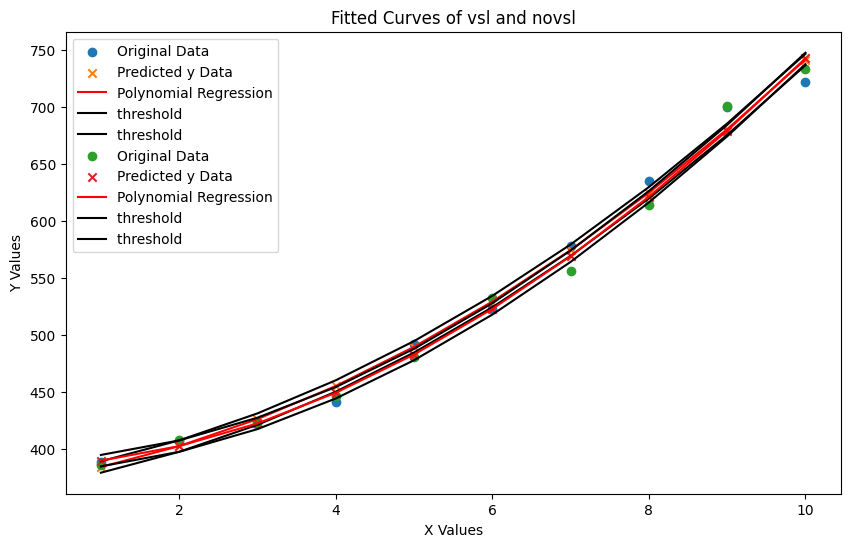

In [7]:
import matplotlib.pyplot as plt
from global_settings import vfs

plt.figure(figsize=(10, 6))
vsl = validator_controller_vsl
nvsl = validator_controller_novsl

# Uncomment to read the validator_controller object from file to plot curves
# vsl = pickle.load(open("vc_vsl.pkl", "rb"))
# nvsl = pickle.load(open("vc_novsl.pkl", "rb"))

# Plot for vsl
#for controller in [validator_controller_vsl,validator_controller_novsl]:
# controller= validator_controller_novsl
#    print(f"X values and Y values {controller.x_values}{controller.y_values} predicted values {controller.predicted_values}")
#    plt.scatter(controller.x_values, controller.y_values, label=f'Original Data ')
#    plt.scatter(controller.x_values, controller.predicted_values, label=f'Predicted y Data ', marker='x')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1], color='red', label=f'Polynomial Regression')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

plt.scatter(vsl.x_values, vsl.y_values, label=f'Original Data ')
plt.scatter(vsl.x_values, vsl.predicted_values, label=f'Predicted y Data ', marker='x')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1], color='red', label=f'Polynomial Regression')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

plt.scatter(nvsl.x_values, nvsl.y_values, label=f'Original Data ')
plt.scatter(nvsl.x_values, nvsl.predicted_values, label=f'Predicted y Data ', marker='x')
plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1], color='red', label=f'Polynomial Regression')
plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Fitted Curves of vsl and novsl')
plt.legend()
plt.show()